In [21]:
import pandas as pd
import numpy as np

In [22]:
df=pd.read_csv('Zoo.csv')

In [23]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [24]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [25]:
df.shape

(101, 18)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


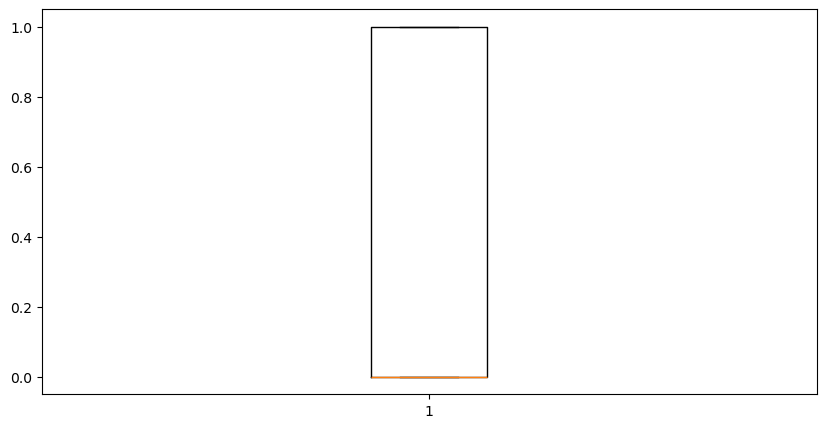

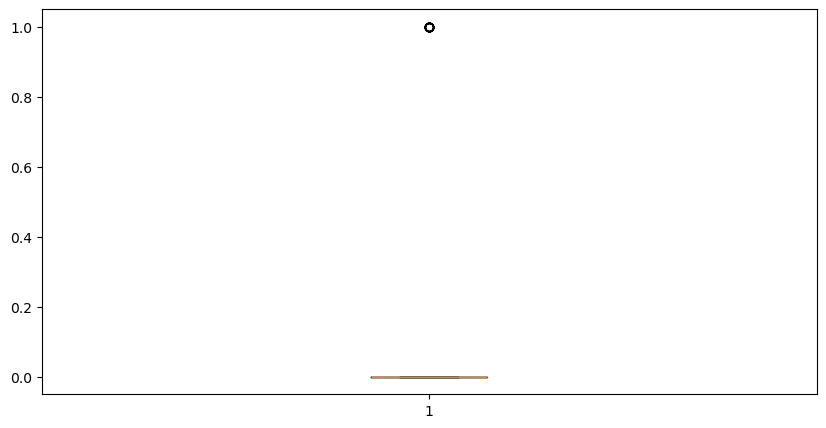

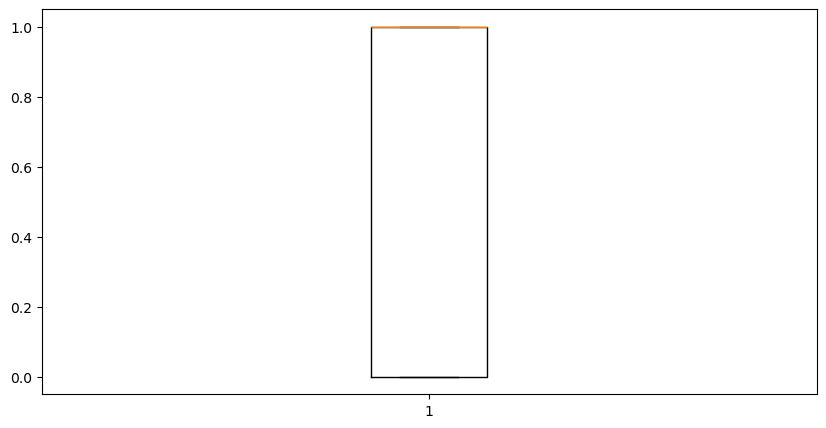

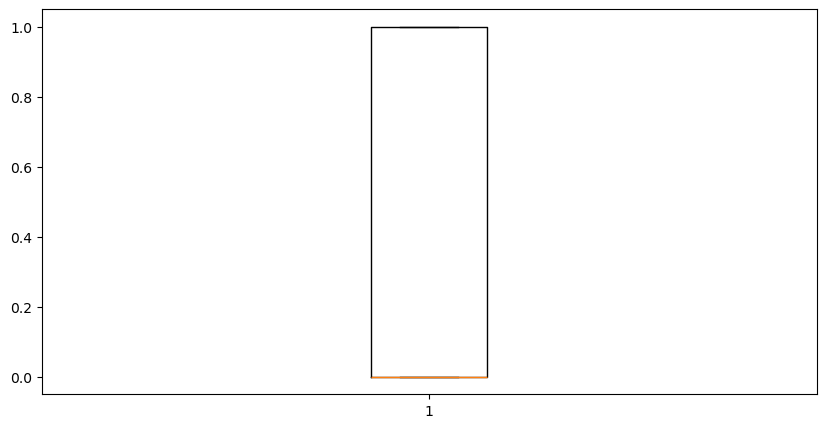

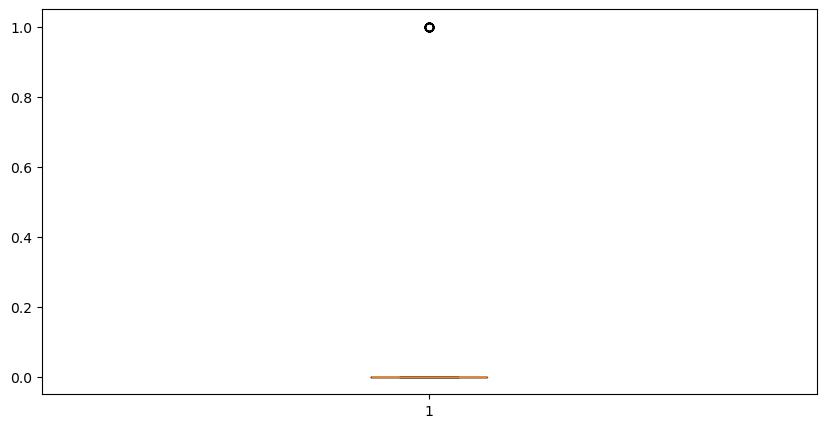

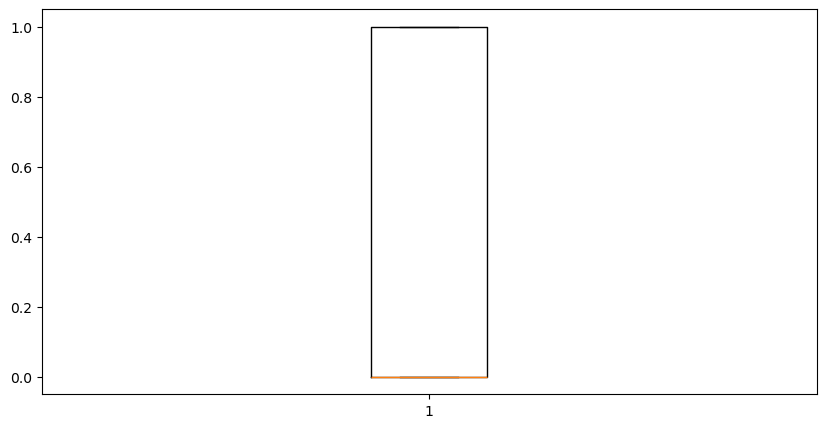

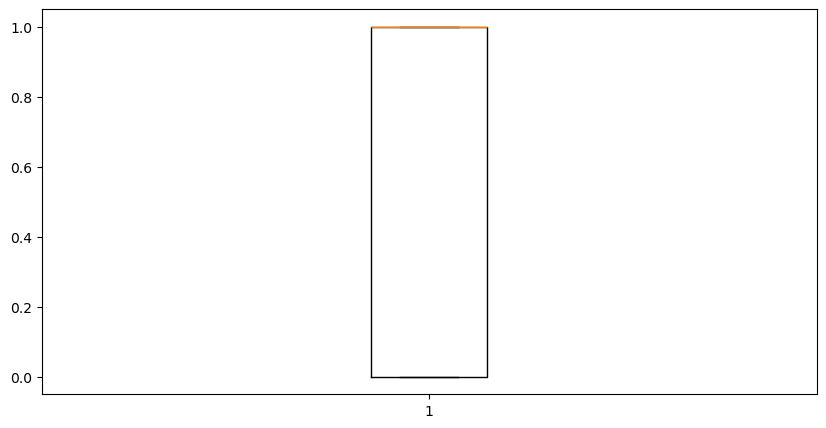

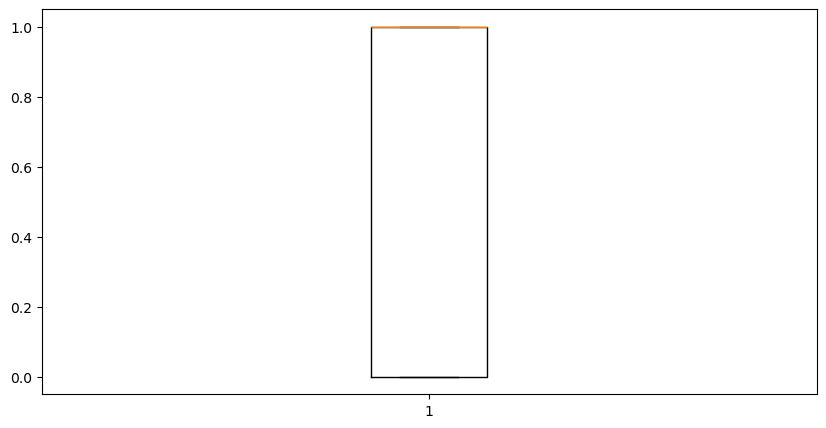

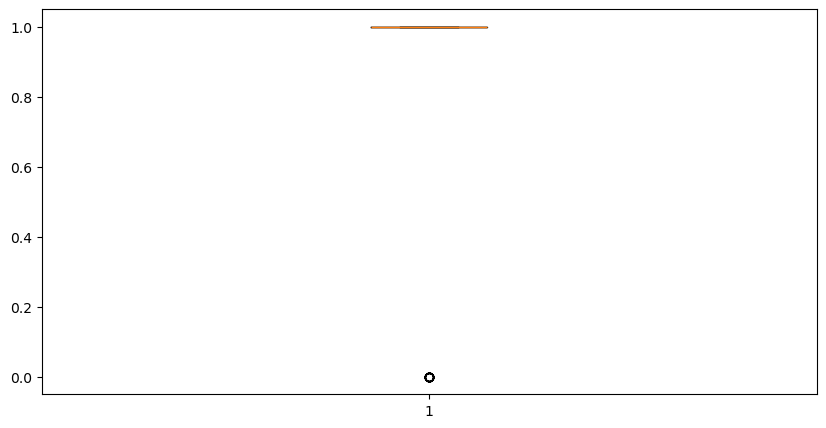

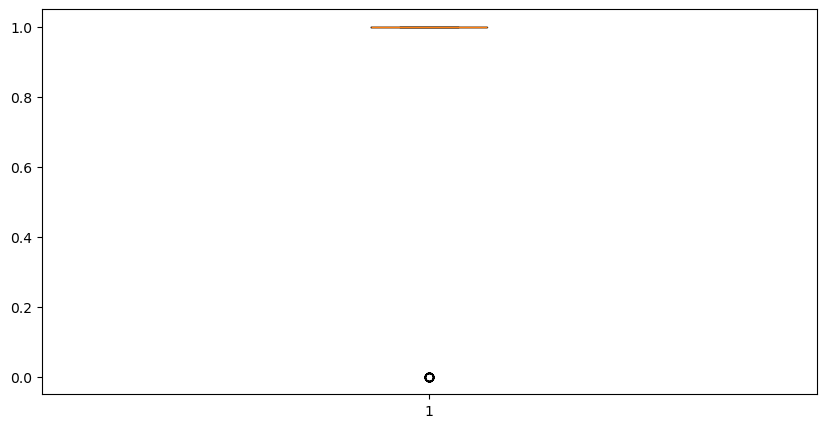

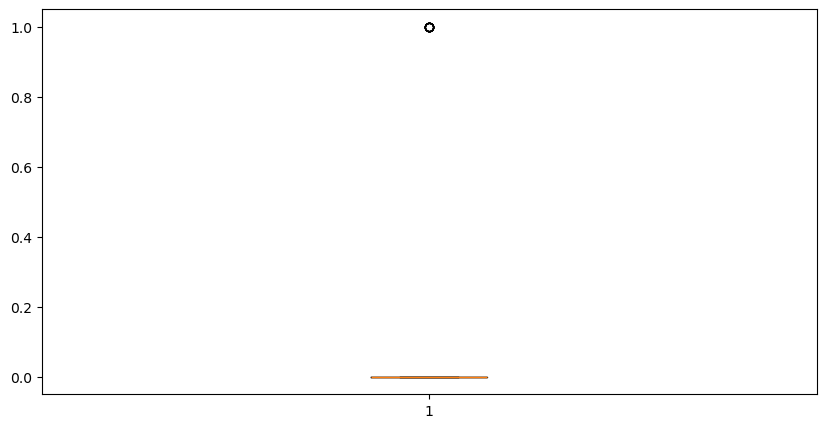

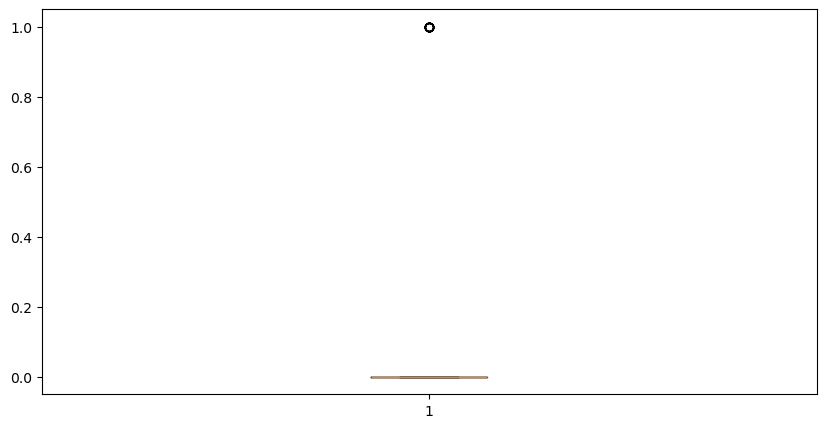

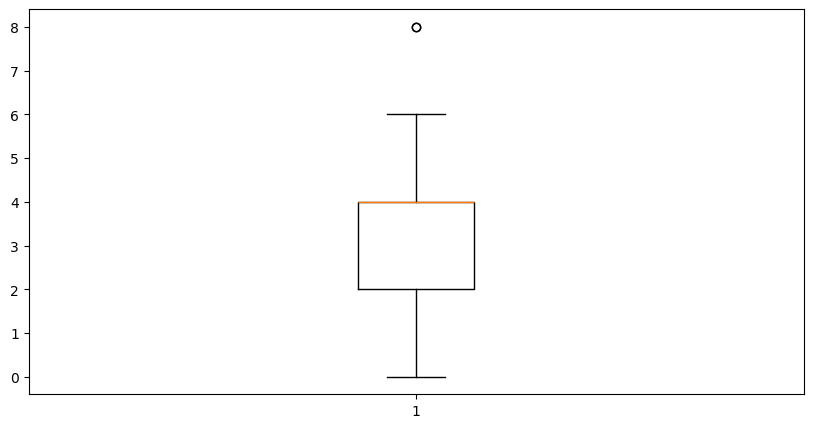

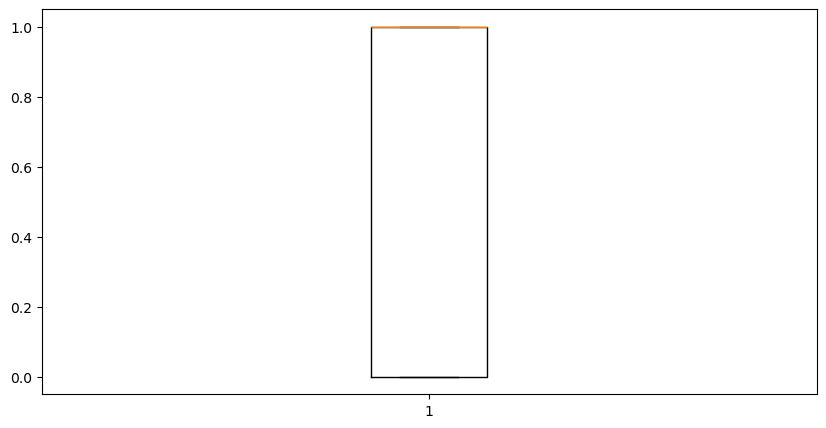

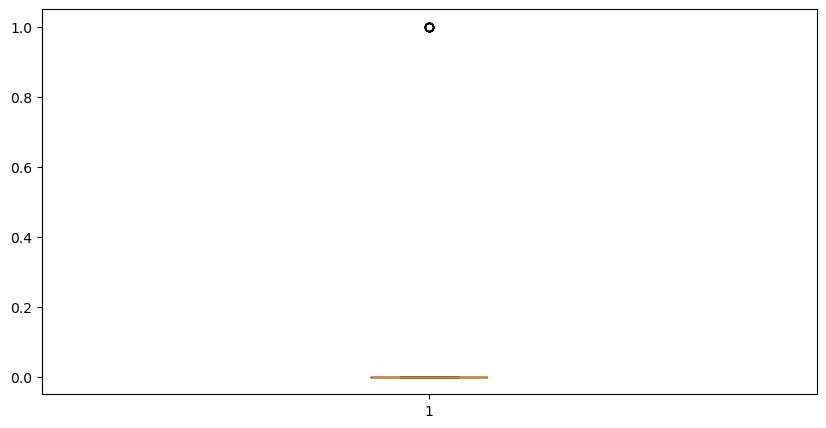

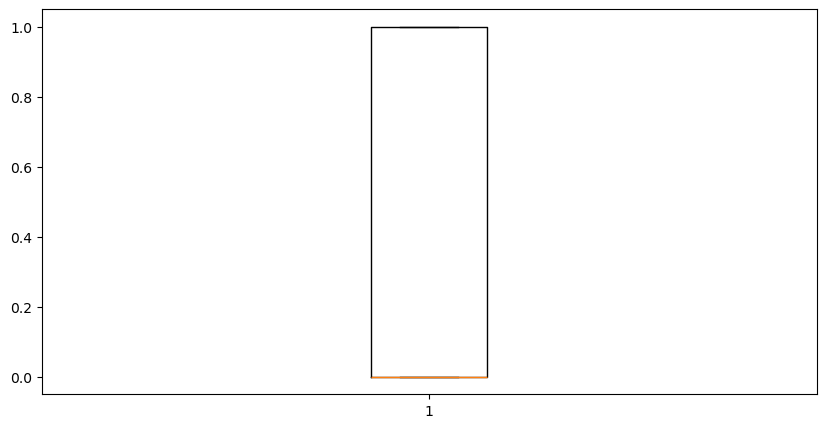

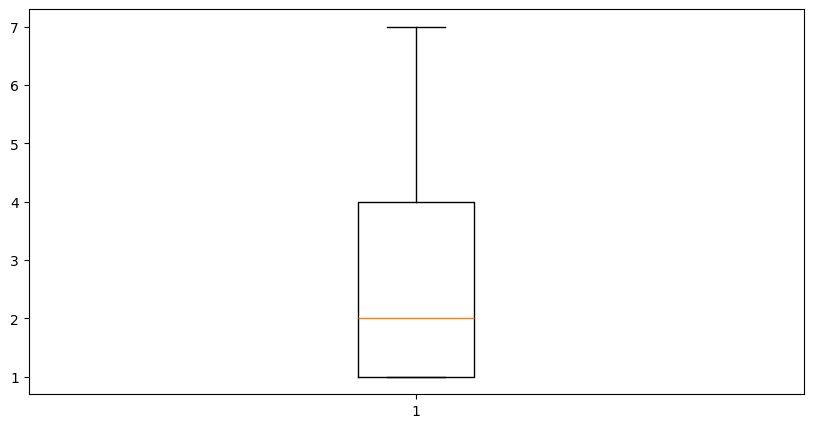

In [27]:
import matplotlib.pyplot as plt
for cols in df.select_dtypes(include=['int','float']).columns:
    plt.figure(figsize=(10,5))
    plt.boxplot(df[cols])

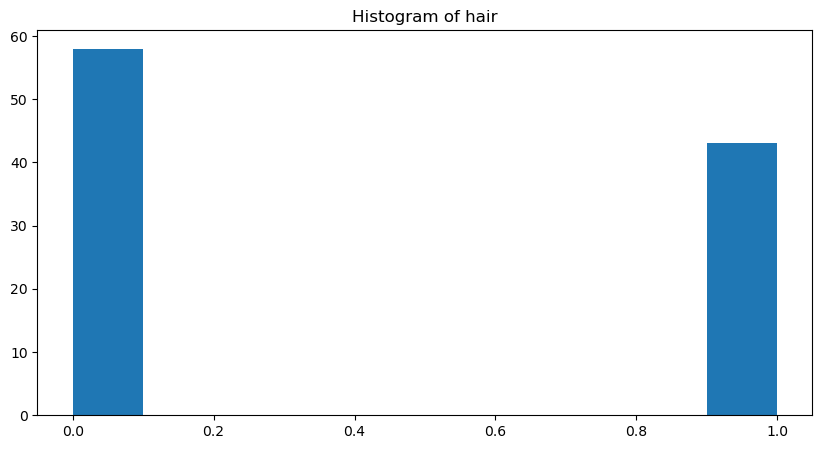

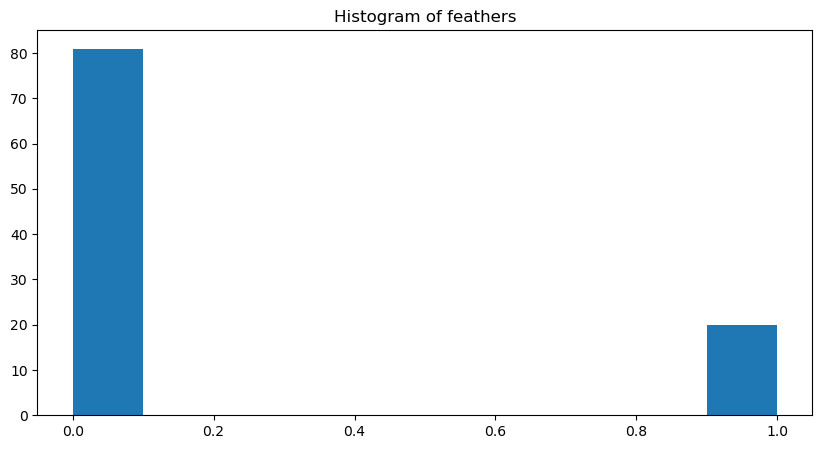

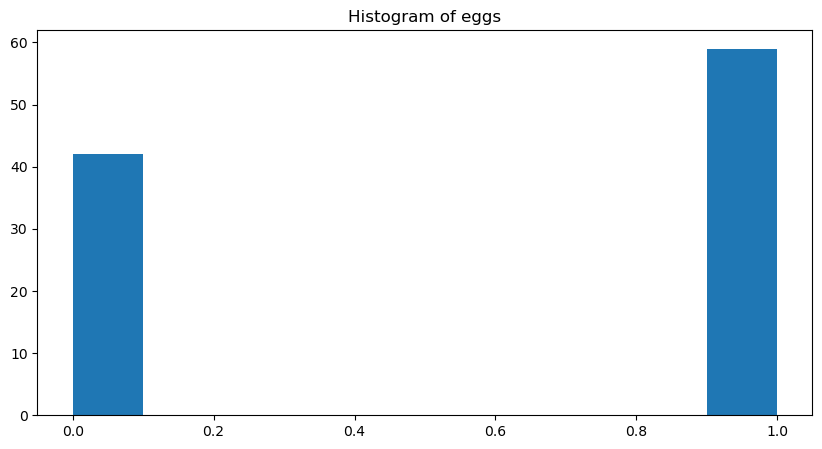

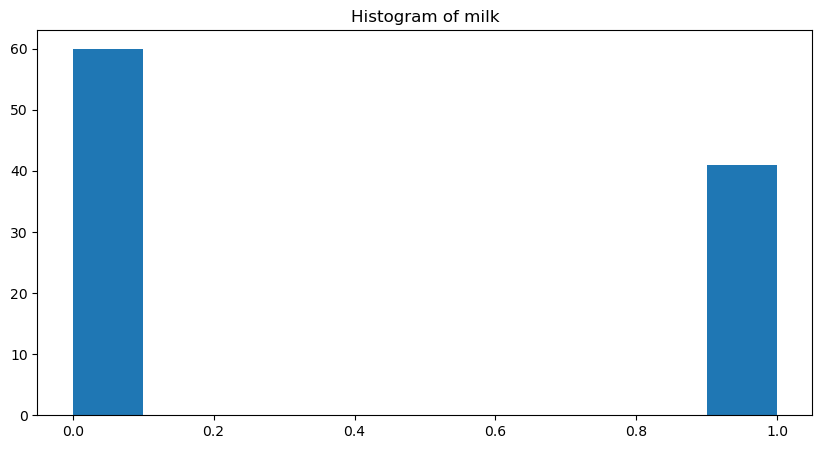

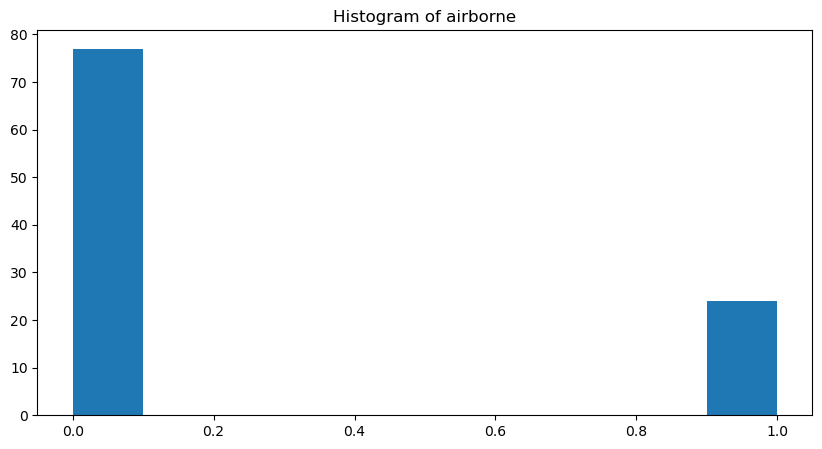

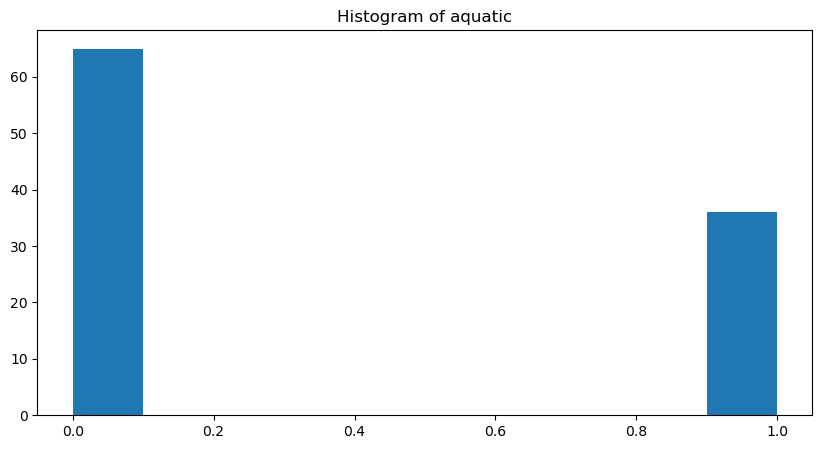

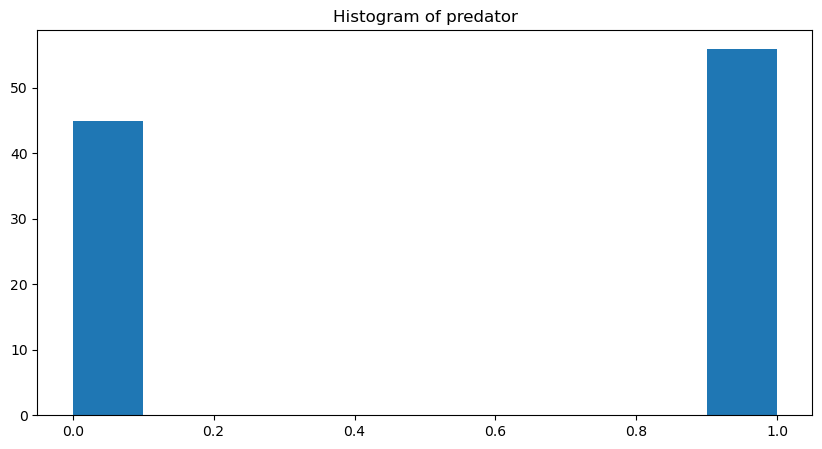

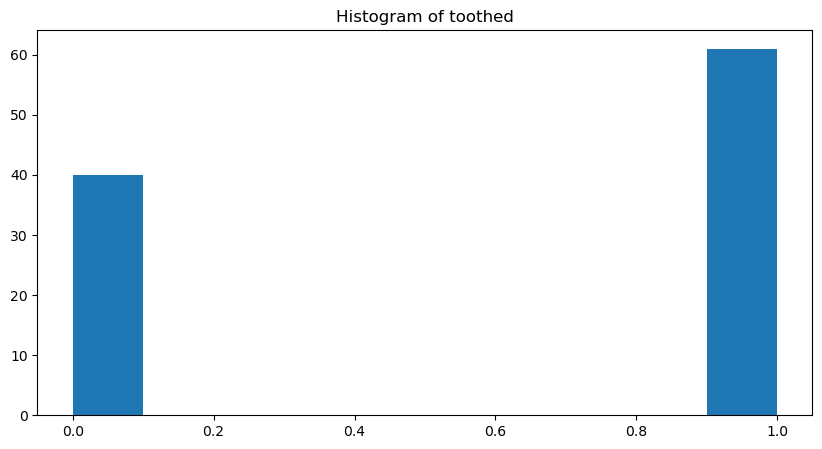

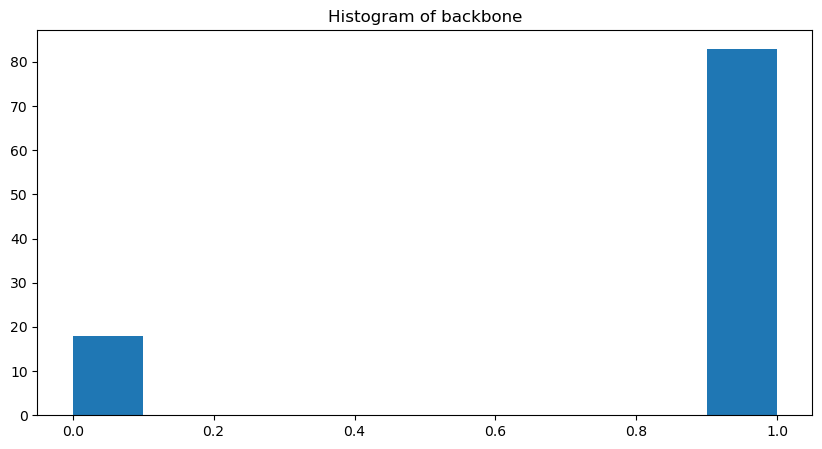

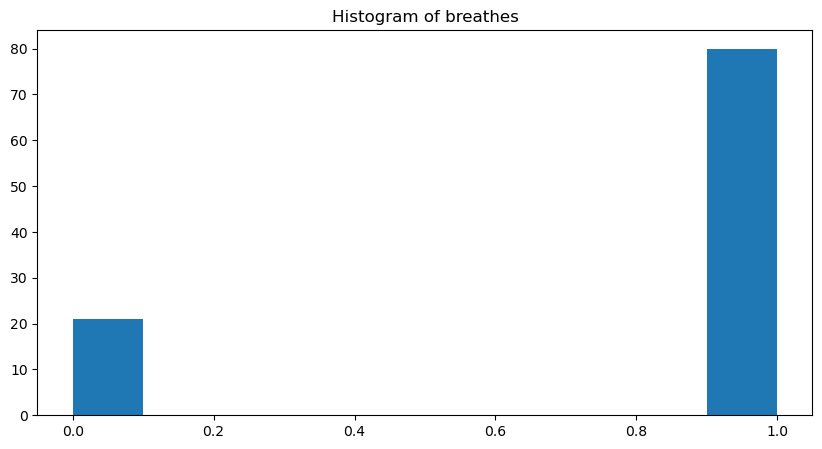

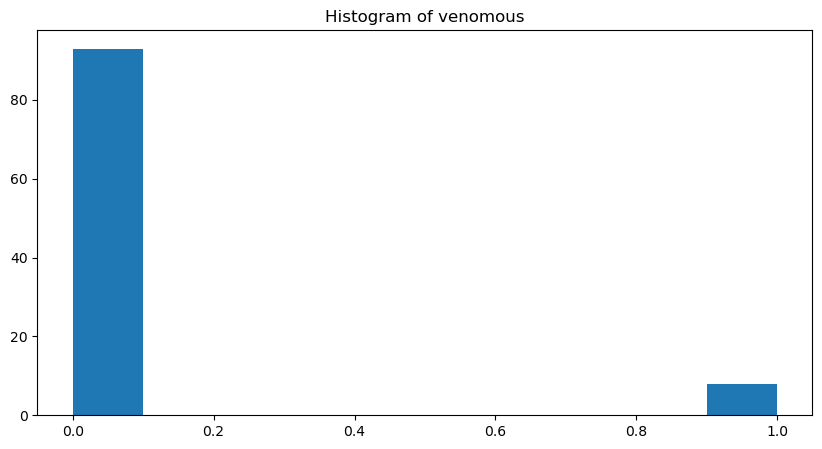

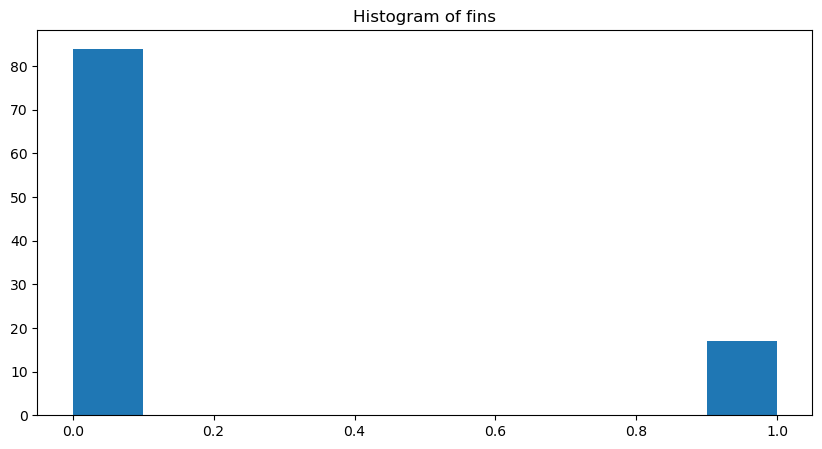

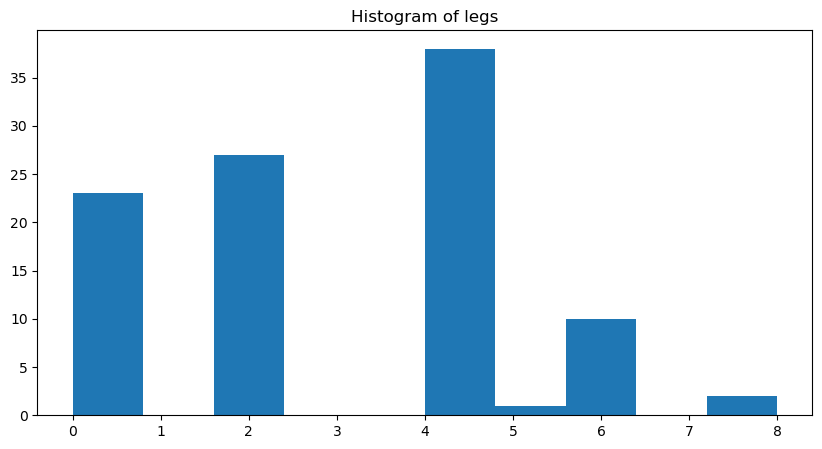

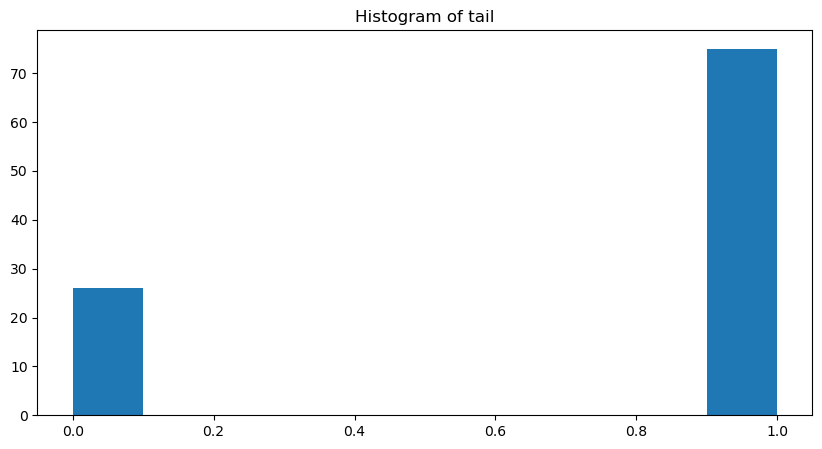

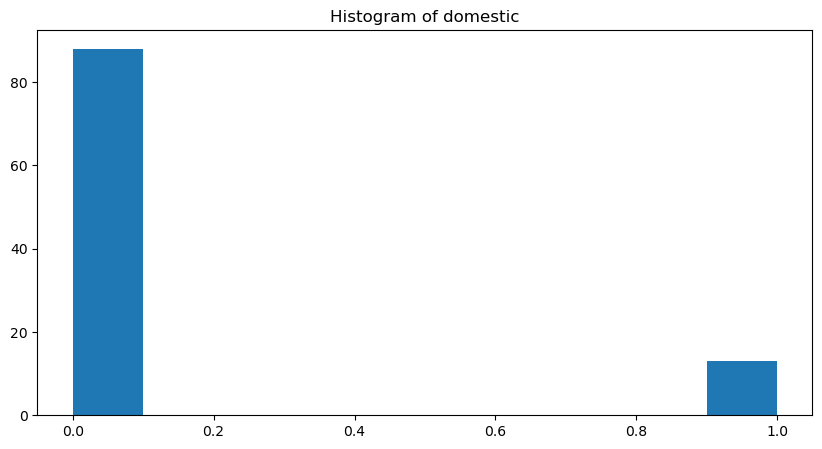

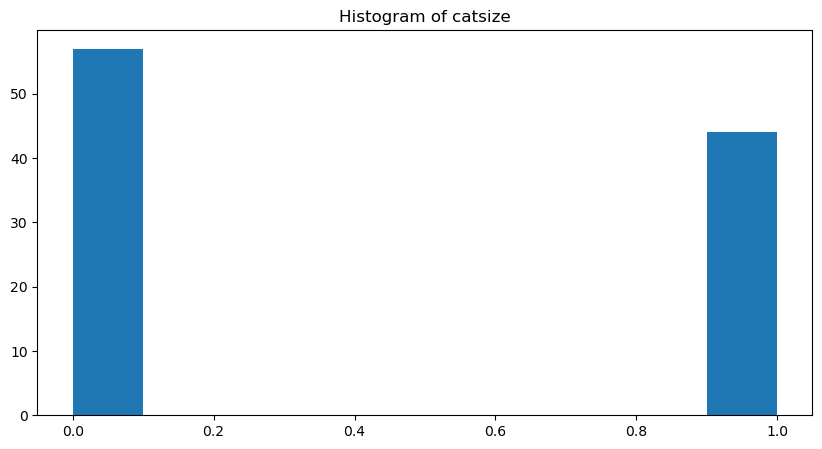

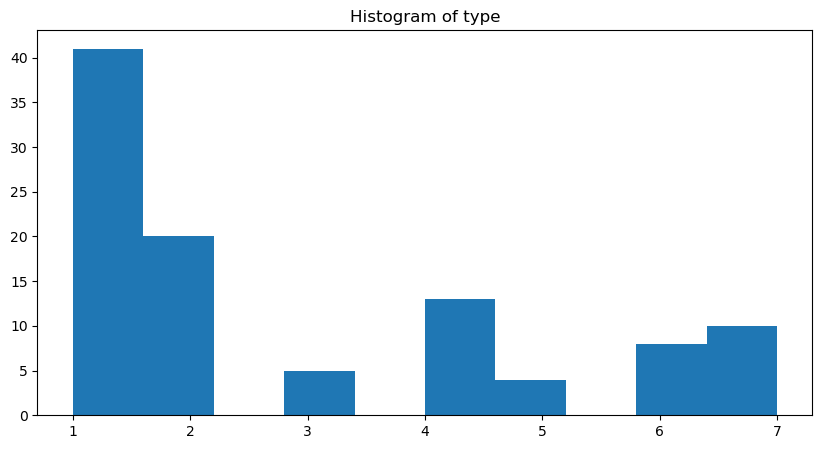

In [28]:
for cols in df.select_dtypes(include=['int']).columns:
    plt.figure(figsize=(10,5))
    plt.hist(df[cols])
    plt.xlabel=cols
    plt.ylabel='values'
    plt.title(f'Histogram of {cols}')
    plt.show()

In [29]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [30]:
df.drop('animal name',axis=1,inplace=True)

In [31]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [32]:
# Spliting the Data
X=df.drop('type',axis=1)
y=df['type']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn=KNeighborsClassifier(n_neighbors=3)
model=knn.fit(X_reduced,y)
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y,test_size=0.2)

In [38]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
training_acc=[]
test_acc=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    model=knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_train)
    Y_pred_test=knn.predict(X_test)
    training_acc.append(accuracy_score(Y_pred,Y_train))
    test_acc.append(accuracy_score(Y_pred_test,Y_test))

In [39]:
print('Cross Validation of training Accuracy:',np.round(np.mean(training_acc),2))
print('Cross Validation of test Accuracy:',np.round(np.mean(test_acc),2))


Cross Validation of training Accuracy: 0.97
Cross Validation of test Accuracy: 0.93


In [43]:
y_pred=knn.predict(X_train)
y_pred_test=knn.predict(X_test)
accuracy_score(y_pred,Y_train)

0.975

In [45]:
accuracy_score(y_pred_test,Y_test)

1.0

In [47]:
precision_score(Y_test,y_pred_test,average='weighted')

1.0

In [49]:
f1_score(Y_test,y_pred_test,average='weighted')

1.0

In [51]:
recall_score(Y_test,y_pred_test,average='weighted')

1.0

In [53]:
n_neighbors=3

In [55]:
from matplotlib.colors import ListedColormap

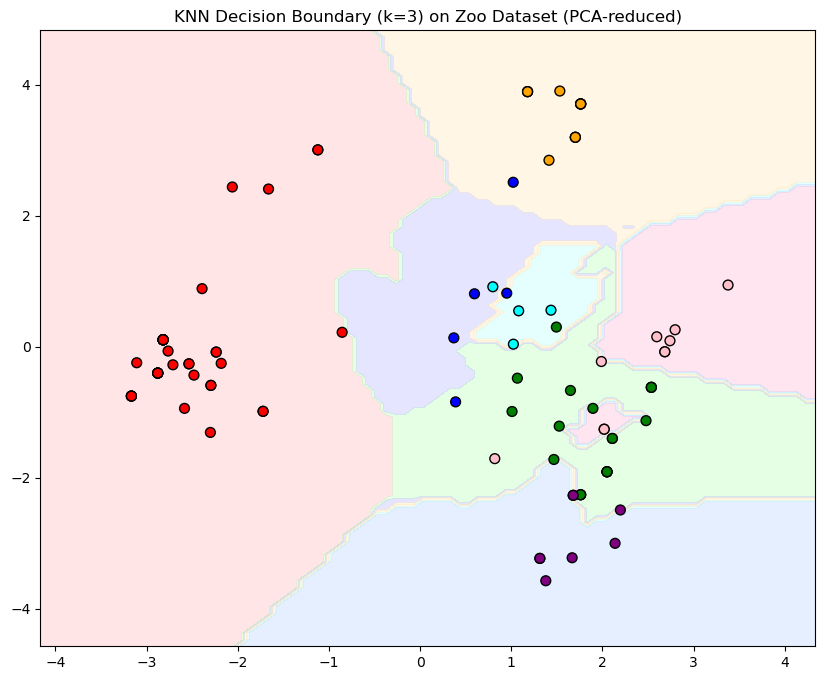

In [61]:
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid to get decision boundaries
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot decision boundaries and dataset points
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFE4AA', '#AAFFFF', '#AACCFF', '#FFAACC'])
cmap_bold = ['red', 'green', 'blue', 'orange', 'cyan', 'purple', 'pink']

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k', s=50)
plt.title(f"KNN Decision Boundary (k={n_neighbors}) on Zoo Dataset (PCA-reduced)")
plt.show()

# Interview Questions
#### 1. What are the key hyperparameters in KNN?
##### Hyperparameters
1. n_neighbors( Set no of neighbors)
2. metrics (Finds the distances from the nearest neighbors)
3. weights (Neighbors weight may increase the accuracy of the model)
4. algorithm (it will increase the computational speed)

#### 2. What distance metrics can be used in KNN?
##### Distance Metrics in KNN
1. Euclidean Distance ( It is the most commonly used metric to find distance)
2. Manhattan Distance ( Useful for grid_based or city block Distances)
3. Miskowski Distance ( It is based on the p value p=1-->Manhattan p=2-->Euclidean)
4. Hamming Distance (Works well with categorical Variables)